# 常见概率分布的Matplotlib实现
>文章来源于公众号：Python与算法社区，作者zglg

本次实验所用的4种常见分布，连续分布的代表：beta分布、正态分布，均匀分布，离散分布的代表：二项分布。

In [1]:
import numpy as np
from scipy.stats import beta, norm, uniform, binom
import matplotlib.pyplot as plt
from functools import wraps

In [2]:
# 定义带四个参数的画图装饰器
def my_plot(label0=None,
            label1=None,
            ylabel='probability density function',
            fn=None):
    def decorate(f):
        @wraps(f)
        def myplot():
            fig = plt.figure(figsize=(16, 9))
            ax = fig.add_subplot(111)
            x, y, y1 = f()
            ax.plot(x, y, linewidth=2, c='r', label=label0)
            ax.plot(x, y1, linewidth=2, c='b', label=label1)
            ax.legend()
            plt.ylabel(ylabel)
            plt.show()
            plt.savefig('img/%s' % (fn, ))
            plt.close()

        return myplot

    return decorate

## 均匀分布(uniform)

In [3]:
@my_plot(label0='b-a=1.0', label1='b-a=2.0', fn='uniform.png')
def unif():
    x = np.arange(-0.01, 2.01, 0.01)
    y = uniform.pdf(x, loc=0.0, scale=1.0)
    y1 = uniform.pdf(x, loc=0.0, scale=2.0)
    return x, y, y1

## 二项分布

In [4]:
@my_plot(
    label0='n=50,p=0.3',
    label1='n=50,p=0.7',
    fn='binom.png',
    ylabel='probability mass function')
def bino():
    x = np.arange(50)
    n, p, p1 = 50, 0.3, 0.7
    y = binom.pmf(x, n=n, p=p)
    y1 = binom.pmf(x, n=n, p=p1)
    return x, y, y1

## 高斯分布

In [5]:
@my_plot(label0='u=0.,sigma=1.0', label1='u=0.,sigma=2.0', fn='guass.png')
def guass():
    x = np.arange(-5, 5, 0.1)
    y = norm.pdf(x, loc=0.0, scale=1.0)
    y1 = norm.pdf(x, loc=0., scale=2.0)
    return x, y, y1

## beta分布

In [6]:
@my_plot(label0='a=10., b=30.', label1='a=4., b=4.', fn='beta.png')
def bet():
    x = np.arange(-0.1, 1, 0.001)
    y = beta.pdf(x, a=10., b=30.)
    y1 = beta.pdf(x, a=4., b=4.)
    return x, y, y1

## 绘制所有四种分布

【均匀分布、二项分布、高斯分布、beta分布】

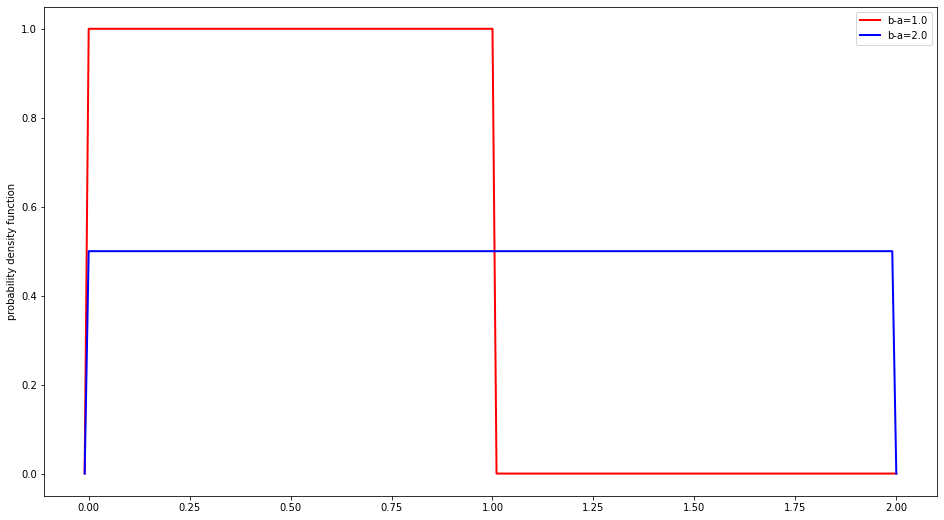

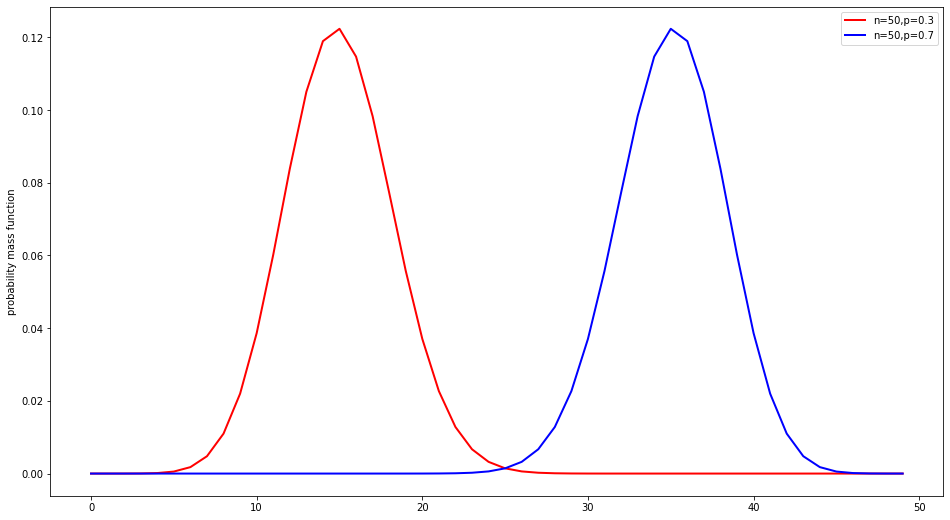

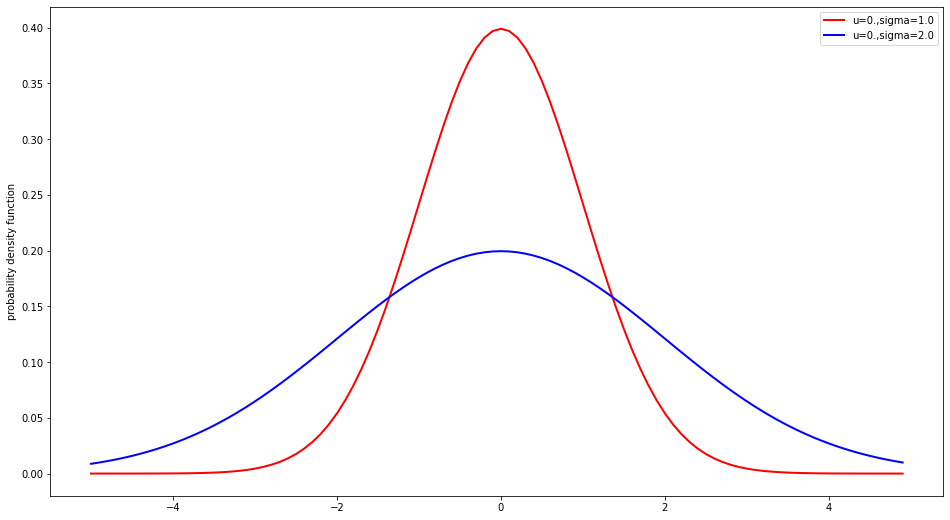

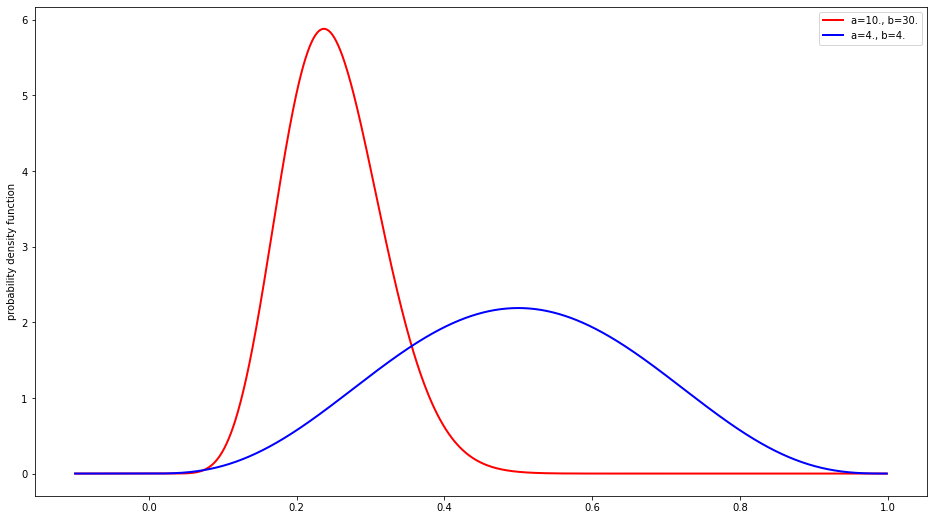

In [7]:
distrs = [unif, bino, guass, bet]
for distri in distrs:
    distri()